#### Step 1: Install libraries

In [1]:
!pip install bitsandbytes transformers accelerate peft -q
!pip install -U "huggingface_hub[cli]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 1.7 MB/s eta 0:00:00


#### Step 2: Login to HF account

In [2]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


#### Step 3: Load pre-trained PaliGemma base model

In [1]:
from transformers import AutoTokenizer, PaliGemmaForConditionalGeneration, PaliGemmaProcessor
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_id = "google/paligemma-3b-mix-224"
model = PaliGemmaForConditionalGeneration.from_pretrained(model_id, torch_dtype=torch.bfloat16)
processor = PaliGemmaProcessor.from_pretrained(model_id)

config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/62.6k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/1.74G [00:00<?, ?B/s]

`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/699 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/40.0k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.26M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

#### Step 4: Inference on images

In [2]:
from PIL import Image, ImageDraw, ImageFont
import cv2
import numpy as np

def draw_bounding_box(image, coordinates, label, width, height):
    global label_colors
    y1, x1, y2, x2 = coordinates
    y1, x1, y2, x2 = map(round, (y1*height, x1*width, y2*height, x2*width))

    text_size, _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 1, 3)
    text_width, text_height = text_size

    text_x = x1 + 2
    text_y = y1 - 5

    font_scale = 1
    label_rect_width = text_width + 8
    label_rect_height = int(text_height * font_scale)

    color = label_colors.get(label, None)
    if color is None:
        color = np.random.randint(0, 256, (3,)).tolist()
        label_colors[label] = color

    cv2.rectangle(image, (x1, y1 - label_rect_height), (x1 + label_rect_width, y1), color, -1)

    thickness = 2
    cv2.putText(image, label, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness, cv2.LINE_AA)

    cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
    return image

In [17]:
from PIL import Image, ImageDraw, ImageFont

input_image = "input_image.jpg" # @param {type: "string"}
input_img = Image.open(input_image)

# Create a copy of the input image.
output_img = np.array(input_img)

prompt = "detect person, car" # @param {type: "string"}

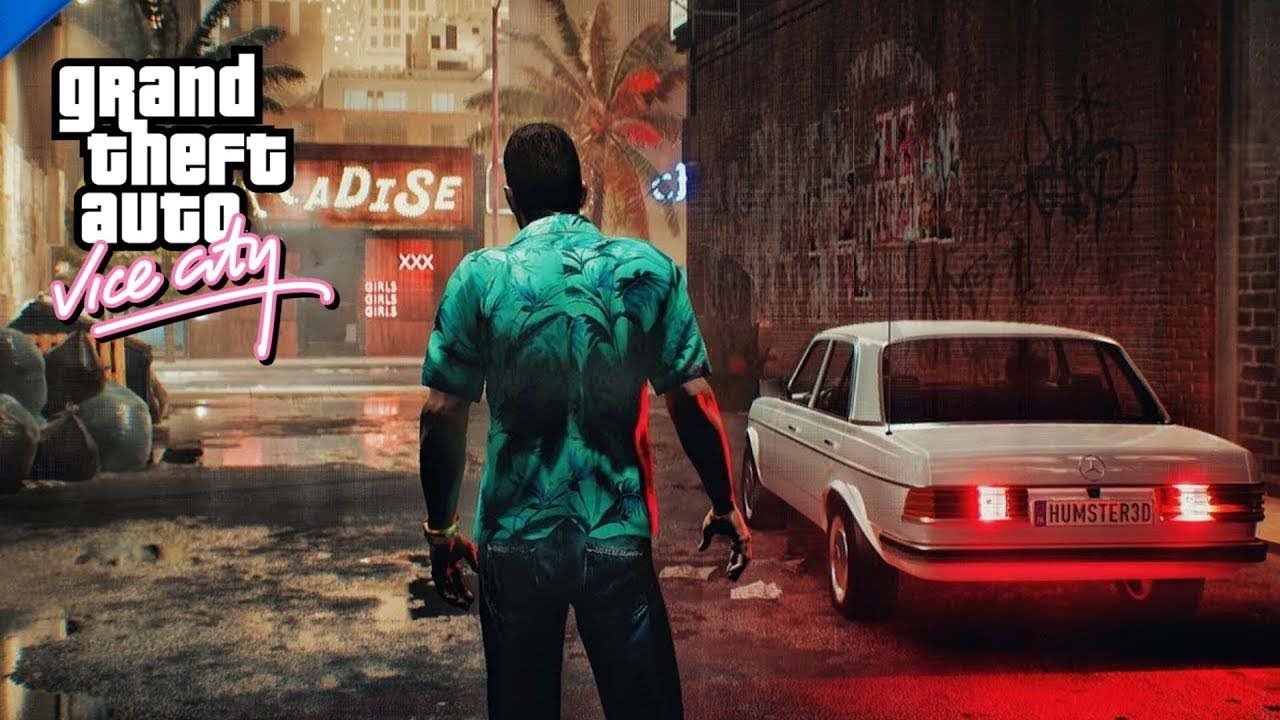

In [18]:
input_img

In [19]:
inputs = processor(text=prompt, images=input_img,
                  padding="longest", do_convert_rgb=True, return_tensors="pt").to("cuda")
model.to(device)
inputs = inputs.to(dtype=model.dtype)

In [20]:
with torch.no_grad():
  output = model.generate(**inputs, max_length=496)

paligemma_response = processor.decode(output[0], skip_special_tokens=True)[len(prompt):].lstrip("\n")

detections = paligemma_response.split(" ; ")

In [31]:
parsed_coordinates = []
labels = []
label_colors = {}

for item in detections:
  detection = item.replace("<loc", "").split()

  if len(detection) >= 2:
    coordinates_str = detection[0]
    label = detection[1]
    if "<seg" in label:
      continue
    else:
      labels.append(label)
  else:
    # No label detected, skip the iteration.
    continue


  coordinates = coordinates_str.split(">")
  coordinates = coordinates[:4]

  if coordinates[-1] == '':
    coordinates = coordinates[:-1]


  coordinates = [int(coord)/1024 for coord in coordinates]
  parsed_coordinates.append(coordinates)

  width = input_img.size[0]
  height = input_img.size[1]

    # Draw bounding boxes on the frame
  image = cv2.cvtColor(np.array(input_img), cv2.COLOR_RGB2BGR)
  for coordinates, label in zip(parsed_coordinates, labels):
    output_image = draw_bounding_box(output_img, coordinates, label, width, height)

  output_image = Image.fromarray(output_image)

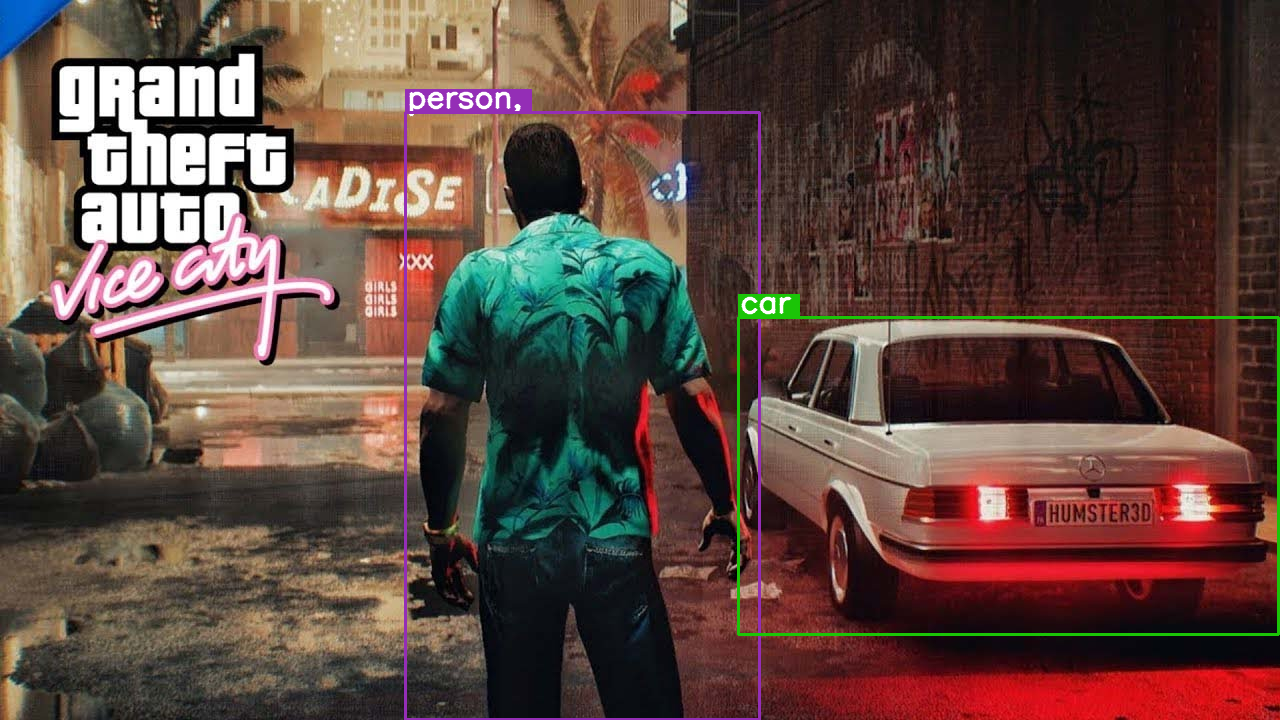

In [32]:
output_image